In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Id = np.array([[1, 0],
              [0, 1]])
X_pauli = np.array([[0, 1],
              [1, 0]])
Y_pauli = np.array([[0, -1j],
              [1j, 0]])
Z_pauli = np.array([[1, 0],
              [0, -1]])
H = np.array([[1, 1],
              [1, -1]]) / np.sqrt(2)
S = np.array([[1, 0],
              [0, 1j]])

CNOT01 = np.array([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 1, 0]])
CNOT10 = np.array([[1, 0, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 1, 0],
                   [0, 1, 0, 0]])
SWAP = np.array([[1, 0, 0, 0],
                 [0, 0, 1, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1]])

In [3]:
def measure_statevec(state, num_shots=1):
        meas_vec=np.zeros(len(state))
        prob = np.abs(state)**2
        possible = np.arange(len(state)) #possible measurement outcomes
        outcome = np.random.choice(possible, p=prob, size = num_shots) #measurement outcome
        
        for meas in outcome:
                meas_vec[meas]+=1
        return meas_vec

In [4]:
def measure_density_matrix(dens, num_shots=1):
        meas_vec=np.zeros(len(np.diag(dens)))
        prob = np.abs(np.diag(dens))
        possible = np.arange(len(np.diag(dens))) #possible measurement outcomes
        outcome = np.random.choice(possible, p=prob, size = num_shots) #measurement outcome
        for meas in outcome:
                meas_vec[meas]+=1
        return meas_vec

## Part A

#StateVector

In [5]:
one_q_init_state=np.array([1,0])  #initialize the 0 state 
H_state=np.dot(H, one_q_init_state)
S_state=np.dot(S,one_q_init_state)

print(H_state)
print(S_state)



[0.70710678 0.70710678]
[1.+0.j 0.+0.j]


#Density Matrix


In [6]:
one_q_init_dens=np.array([[1,0],
                          [0,0]])  #initialize the 0 state 
H_dens=np.dot(H, np.dot(one_q_init_dens,H.conj().transpose()))
S_dens=np.dot(S, np.dot(one_q_init_dens,S.conj().transpose()))

print(H_dens)
print(S_dens)

[[0.5 0.5]
 [0.5 0.5]]
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


In [7]:
two_q_init_state=np.array([1,0,0,0])

bell_state=np.dot(CNOT01,np.dot(np.kron(H,Id),two_q_init_state))
print(bell_state)


[0.70710678 0.         0.         0.70710678]


In [8]:
two_q_init_dens=np.array([[1, 0, 0, 0],
                           [0, 0, 0, 0],
                           [0, 0, 0, 0],
                           [0, 0, 0, 0]])

bell_circ=np.dot(CNOT01,np.kron(H,Id))

bell_dens=np.dot(bell_circ,np.dot(two_q_init_dens,bell_circ.conj().transpose()))
print(bell_dens)

[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]


In [9]:
measure_statevec(bell_state,num_shots=1000)

array([517.,   0.,   0., 483.])

In [10]:
measure_density_matrix(bell_dens,num_shots=1000)

array([499.,   0.,   0., 501.])

## Numerical Eigenvalue Analysis

In [11]:
def two_level_Hamiltonian_comp_basis(E1,E2,V11,V12,V21,V22,l):
    H_0=np.array([[E1, 0],
                  [0, E2]])
    H_1= np.array([[V11, V12],
                   [V21, V22]])
    
    return H_0+l*H_1

In [12]:
def two_level_Hamiltonian_pauli_basis(E1,E2,V11,V12,V21,V22,l):
    E=(E1+E2)/2
    Om=(E1-E2)/2
    c=(V11+V22)/2
    w_z=(V11-V22)/2
    w_x=V12
    H_0=E*Id+Om*Z_pauli
    H_1= c*Id+w_z*Z_pauli+w_x*X_pauli
    
    return H_0+l*H_1

In [13]:
H=two_level_Hamiltonian_pauli_basis(0,4,3,0.2,0.2,-3,1)
val,vecs=np.linalg.eigh(H)

In [14]:
val

array([0.9801961, 3.0198039])

In [15]:
vecs

array([[ 0.09853762, -0.99513333],
       [-0.99513333, -0.09853762]])

In [16]:
lambdas=np.arange(0.1,4/3,0.01)
vals_1=[]
vals_2=[]
vecs_1=[]
vecs_2=[]
for l in lambdas:
    H=two_level_Hamiltonian_pauli_basis(0,4,3,0.2,0.2,-3,l)
    val,vecs=np.linalg.eigh(H)
    vals_1.append(val[0])
    vals_2.append(val[1])
    vecs_1.append(vecs[0][0])
    vecs_2.append(vecs[1][0])

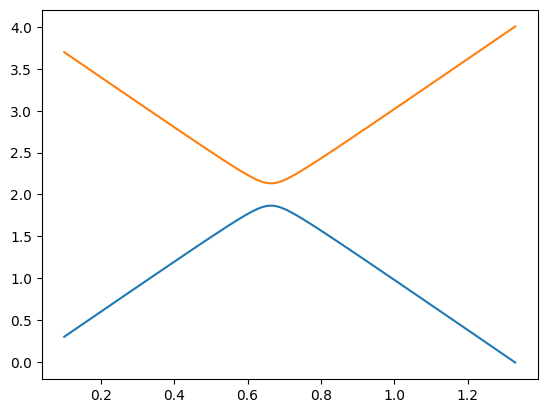

In [17]:
plt.plot(lambdas,vals_1,label='0')
plt.plot(lambdas,vals_2,label='1')

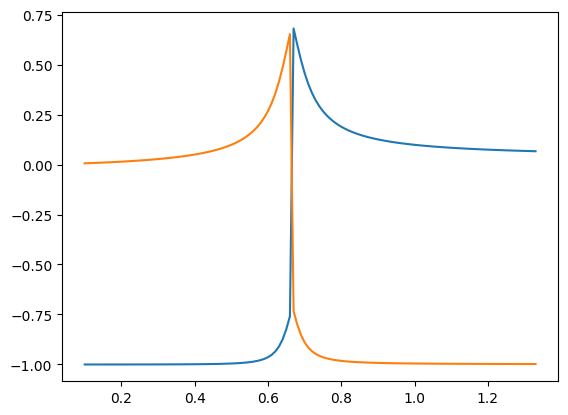

In [18]:
plt.plot(lambdas,vecs_1,label='0')
plt.plot(lambdas,vecs_2,label='1')

In [19]:
H=two_level_Hamiltonian_pauli_basis(0,4,3,0.2,0.2,-3,2/3)
val,vecs=np.linalg.eigh(H)

In [20]:
val

array([1.86666667, 2.13333333])

## Own Implemented VQE Analysis

In [21]:

def Energy_ansatz(theta,phi,ham):
    Rx = np.cos(theta*0.5)*Id-1j*np.sin(theta*0.5)*X_pauli
    Ry = np.cos(phi*0.5)*Id-1j*np.sin(phi*0.5)*Y_pauli
    init_state=np.array([1,0])
    circ_ansatz = np.dot(Ry ,Rx)

    state=np.dot(circ_ansatz,init_state)
    Energy = state.conj().T @ ham @ state
    return [Energy,state]


def Energy_Devs(x0,ham):
    theta = x0[0]
    phi = x0[1]

    pi2 = 0.5*np.pi
    thetagradient = 0.5*(Energy_ansatz(theta+pi2,phi,ham)[0]-Energy_ansatz(theta-pi2,phi,ham)[0])
    phigradient = 0.5*(Energy_ansatz(theta,phi+pi2,ham)[0]-Energy_ansatz(theta,phi-pi2,ham)[0])
    return [thetagradient,phigradient]


def VQE(theta,phi,ham,N_iterations,eta):
    x0 = np.array([theta,phi])
    dev=[]
    en=[]
    vec=[]
    params=[]
    for iter in range(N_iterations):
        EDerivative = Energy_Devs(x0,ham) 
        thetagradient = EDerivative[0]
        phigradient = EDerivative[1]
        theta -= eta*thetagradient
        phi -= eta*phigradient
        x0 = np.array([theta,phi])
        energy,state=Energy_ansatz(theta,phi,ham)
        dev.append(EDerivative)
        en.append(energy)
        vec.append(state)
        params.append(x0)
    vqe_info=[en,vec,params,dev]
    return vqe_info

eta = 1
N_iterations = 100
theta = 2*np.pi*np.random.rand()
phi = 2*np.pi*np.random.rand()


In [22]:
en,vec,params,dev=VQE(theta,phi,H,N_iterations,1)

c:\Users\rubenb\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


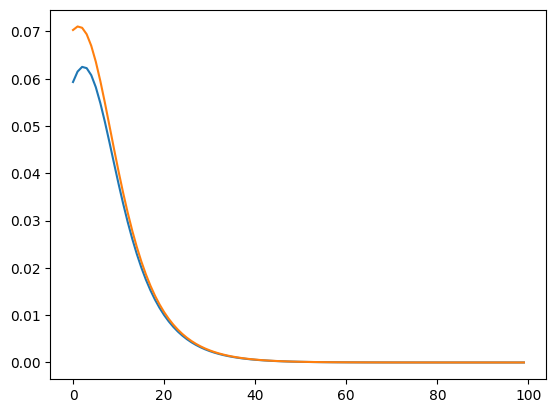

In [23]:
plt.plot(dev)

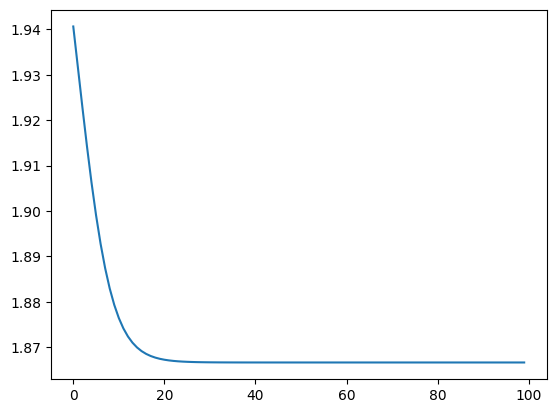

In [24]:
plt.plot(en)

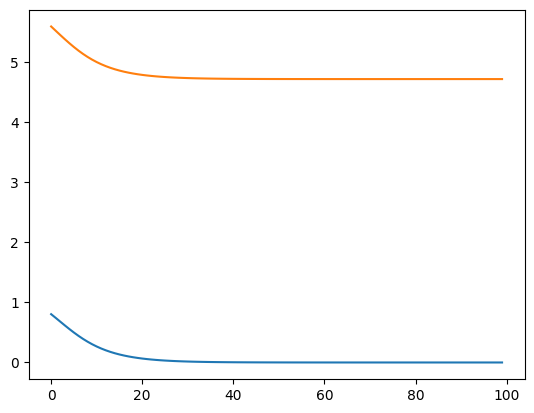

In [25]:
plt.plot(params)

In [26]:

lambdas=np.arange(0.1,4/3,0.01)
gs=[]
excited=[]
wave_gs_0=[]
wave_gs_1=[]

for l in lambdas:
    H=two_level_Hamiltonian_pauli_basis(0,4,3,0.2,0.2,-3,l)
    en,vec,params,dev=VQE(theta,phi,H,N_iterations,1)
    gs.append(en[-1])
    wave_gs_0.append(vec[-1][0])
    wave_gs_1.append(vec[-1][1])

    en,vec,params,dev=VQE(theta,phi,-H,N_iterations,1)
    excited.append(-en[-1])

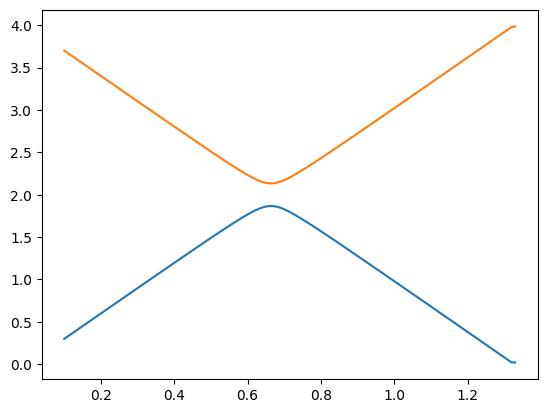

In [27]:
plt.plot(lambdas,gs,label='0')
plt.plot(lambdas,excited,label='1')

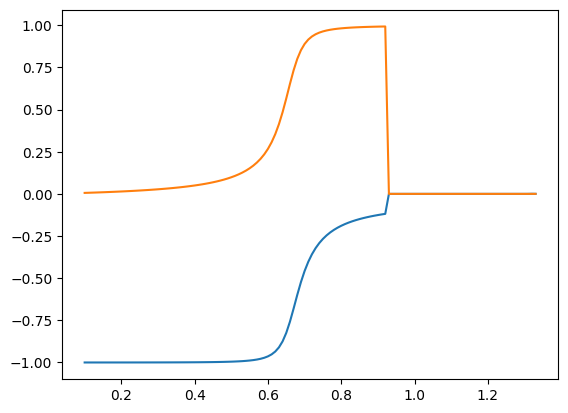

In [28]:
plt.plot(lambdas,wave_gs_0,label='0')
plt.plot(lambdas,wave_gs_1,label='1')

In [79]:
from qiskit.circuit import ParameterVector
from qiskit.opflow import X, Z, I, Y


from qiskit.algorithms import MinimumEigensolver, VQEResult
#from qiskit.providers.aer import QasmSimulator, Aer
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator,
                                Sampler as RuntimeSampler,
                                Options)
from qiskit.primitives import Sampler,Estimator
#from qiskit_aer.noise import NoiseModel

#from openquantumcomputing2.Mixer import *
#import asset_loader

from qiskit import *
from qiskit.visualization import *
from qiskit.algorithms.optimizers import COBYLA,NFT,GradientDescent,ADAM,SPSA
from qiskit.algorithms.minimum_eigensolvers import  VQE
from qiskit.circuit.library import EvolvedOperatorAnsatz

In [30]:
def ansatz(N_qubits,N_layers):
  theta = ParameterVector("m",2*N_qubits*N_layers)
  qr=QuantumRegister(N_qubits)
  qc=QuantumCircuit(qr)
  k=0
  for _ in range(N_layers):
    for i in range(N_qubits):
        qc.rx(theta[k],qr[i])
        k+=1
        qc.ry(theta[k],qr[i])
        k+=1

  return qc

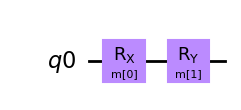

In [31]:
ansatz(1,1).draw(output='mpl')

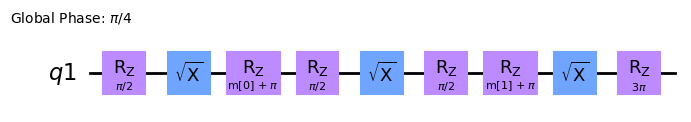

In [32]:
transpile(ansatz(1,1),basis_gates=['cx','rz','sx','x']).draw(output='mpl')

In [33]:
def Hamiltonian_pauli(E1,E2,V11,V12,V21,V22,l):
    E=(E1+E2)/2
    Om=(E1-E2)/2
    c=(V11+V22)/2
    w_z=(V11-V22)/2
    w_x=V12

    
    return E*I + Om*Z + l*c*I + l*w_z*Z + l*w_x*X

In [34]:
ham=Hamiltonian_pauli(0,4,3,0.2,0.2,-3,1)

In [35]:
# Define a custome VQE class to orchestra the ansatz, classical optimizers, 
# initial point, callback, and final result
class QiskitVQE(MinimumEigensolver):
    
    def __init__(self,estimator, ansatz, optimizer,ham,initial_parameters=None,callback=None):
        self._estimator = estimator
        self._circuit = ansatz
        self._optimizer = optimizer
        self._callback = callback
        self._initial_parameters=initial_parameters
        self._obs=ham

        
    def compute_minimum_eigenvalue(self,min):
                
        # Define objective function to classically minimize over
        def objective(x):
            job = self._estimator.run(self._circuit,self._obs,[x])
            H=job.result().values[0]
            
            if self._callback is not None:
                self._callback(H)
            return H
            
        # Select an initial point for the ansatzs' parameters
        if self._initial_parameters is None:
            x0 = np.pi/2 * np.random.rand(self._circuit.num_parameters)
            
        else:
            x0=self._initial_parameters
        
        # Run optimization
        res = self._optimizer.minimize(objective, x0=x0)

        job = self._estimator.run(self._circuit,self._obs,[res.x])
        H=job.result().values[0]
       
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = H
        result.optimal_parameters = res.x
        return result

In [36]:
intermediate_info = []
def callback(data):
                intermediate_info.append(data)

# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator()



nft=NFT(maxiter=100, maxfev=1024, disp=False, reset_interval=100, options=None)
cobyla=COBYLA(maxiter=1000, disp=True, rhobeg=0.1, tol=0.01, options=None)
adam=ADAM(maxiter=300, tol=1e-02, lr=0.1, beta_1=0.9, beta_2=0.99, noise_factor=1e-08, eps=1e-10, amsgrad=True, snapshot_dir=None)
g_d=GradientDescent(maxiter=300,learning_rate=1, tol=0.001, callback=None, perturbation=None)
spsa=SPSA(maxiter=100, blocking=False, allowed_increase=None, trust_region=False, learning_rate=None, perturbation=None, last_avg=1, resamplings=1, perturbation_dims=None, callback=None)

ans=ansatz(1,1)

custom_vqe = QiskitVQE(estimator,ans,g_d,ham,None,callback=callback)
result = custom_vqe.compute_minimum_eigenvalue(min)

C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()


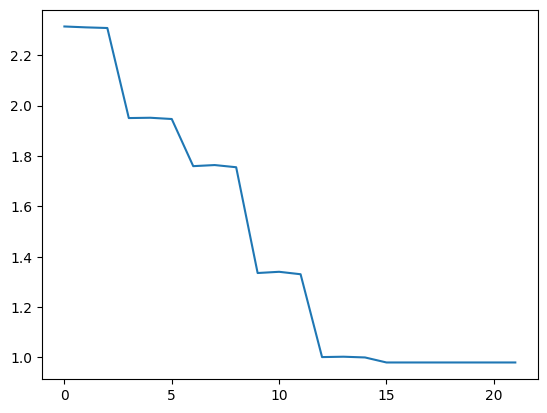

In [37]:
plt.plot(intermediate_info)

In [38]:

lambdas=np.arange(0.1,4/3,0.01)
gs=[]
excited=[]

for l in lambdas:
    intermediate_info= []
    H=Hamiltonian_pauli(0,4,3,0.2,0.2,-3,l)
    custom_vqe = QiskitVQE(estimator,ans,g_d,H,None,callback=callback)
    result = custom_vqe.compute_minimum_eigenvalue(min)
    gs.append(intermediate_info[-1])

    intermediate_info= []
    custom_vqe = QiskitVQE(estimator,ans,g_d,-H,None,callback=callback)
    result = custom_vqe.compute_minimum_eigenvalue(min)
    excited.append(-intermediate_info[-1])

C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`

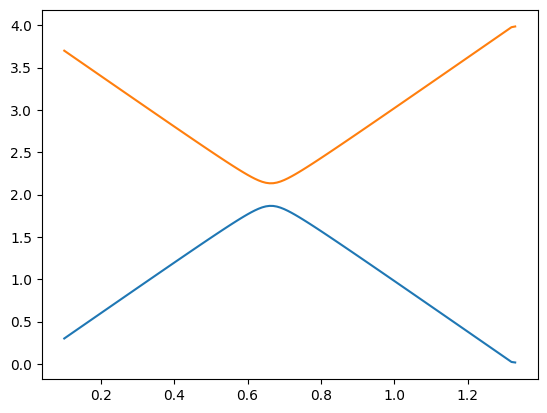

In [39]:
plt.plot(lambdas,gs,label='0')
plt.plot(lambdas,excited,label='1')

In [42]:
optimizers=[cobyla,adam,g_d,spsa]
energies=[]
for opt in optimizers:
    intermediate_info= []
    initial_parameters=[np.pi/2,np.pi/2]
    H=Hamiltonian_pauli(0,4,3,0.2,0.2,-3,2/3)
    custom_vqe = QiskitVQE(estimator,ans,opt,H,initial_parameters=initial_parameters,callback=callback)
    result = custom_vqe.compute_minimum_eigenvalue(min)
    energies.append(intermediate_info)

C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`

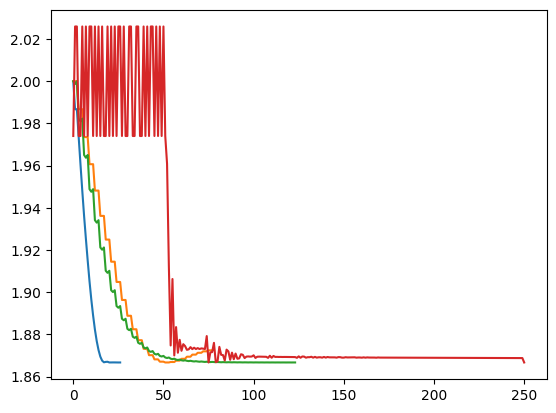

In [43]:
for en in energies:
    plt.plot(en)

In [44]:
num_shots=[100,1000,10000,100000,None]
energies=[]
for shots in num_shots:
    intermediate_info= []
    initial_parameters=[np.pi/2,np.pi/2]
    estimator = Estimator(options={'shots': shots})
    H=Hamiltonian_pauli(0,4,3,0.2,0.2,-3,2/3)
    custom_vqe = QiskitVQE(estimator,ans,cobyla,H,initial_parameters=initial_parameters,callback=callback)
    result = custom_vqe.compute_minimum_eigenvalue(min)
    energies.append(intermediate_info)

C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`

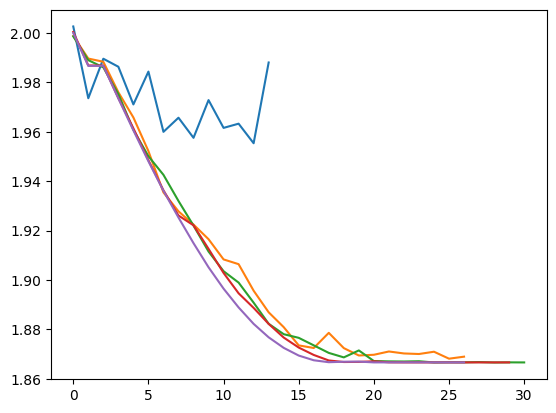

In [45]:
for en in energies:
    plt.plot(en)

In [46]:
num_shots=[100,1000,10000,100000,None]
energies=[]
for shots in num_shots:
    intermediate_info= []
    initial_parameters=[np.pi/2,np.pi/2]
    estimator = Estimator(options={'shots': shots})
    H=Hamiltonian_pauli(0,4,3,0.2,0.2,-3,2/3)
    custom_vqe = QiskitVQE(estimator,ans,g_d,H,initial_parameters=initial_parameters,callback=callback)
    result = custom_vqe.compute_minimum_eigenvalue(min)
    energies.append(intermediate_info)

C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`

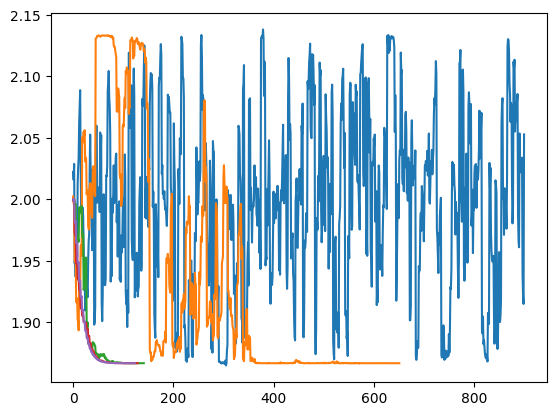

In [47]:
for en in energies:
    plt.plot(en)

In [48]:
num_shots=[100,1000,10000,100000,None]
energies=[]
for shots in num_shots:
    intermediate_info= []
    initial_parameters=[np.pi/2,np.pi/2]
    estimator = Estimator(options={'shots': shots})
    H=Hamiltonian_pauli(0,4,3,0.2,0.2,-3,2/3)
    custom_vqe = QiskitVQE(estimator,ans,adam,H,initial_parameters=initial_parameters,callback=callback)
    result = custom_vqe.compute_minimum_eigenvalue(min)
    energies.append(intermediate_info)

C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`

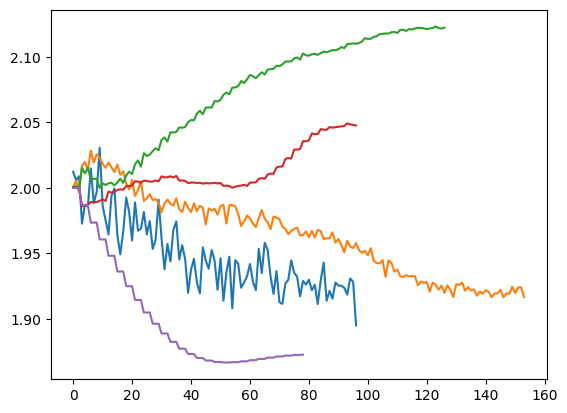

In [49]:
for en in energies:
    plt.plot(en)

In [50]:
num_shots=[100,1000,10000,100000,None]
energies=[]
for shots in num_shots:
    intermediate_info= []
    initial_parameters=[np.pi/2,np.pi/2]
    estimator = Estimator(options={'shots': shots})
    H=Hamiltonian_pauli(0,4,3,0.2,0.2,-3,2/3)
    custom_vqe = QiskitVQE(estimator,ans,spsa,H,initial_parameters=initial_parameters,callback=callback)
    result = custom_vqe.compute_minimum_eigenvalue(min)
    energies.append(intermediate_info)

C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.VQEResult``. See https://qisk.it/algo_migration for a migration guide.
  result = VQEResult()
C:\Users\rubenb\AppData\Local\Temp\ipykernel_2392\1951546275.py:38: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.vqe.VQEResult`

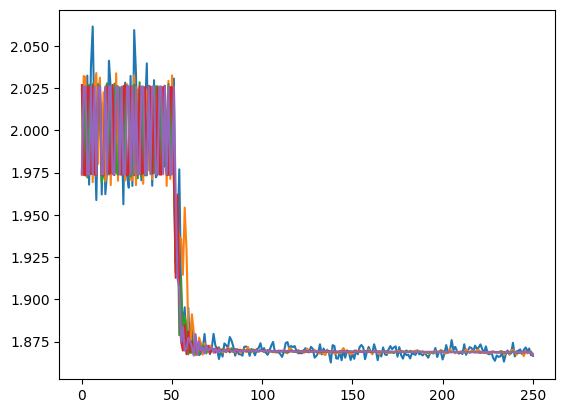

In [52]:
for en in energies:
    plt.plot(en)

## Two Qubit Hamiltonian 

In [53]:
def two_qubits_Hamiltonian(E00,E10,E01,E11,Hx,Hz,l):
    H_0=np.array([[E00, 0, 0, 0],
                  [0, E10, 0, 0],
                  [0, 0, E01, 0],
                  [0, 0, 0, E11]])
    H_1= Hx*np.kron(X_pauli,X_pauli)+Hz*np.kron(Z_pauli,Z_pauli)
    
    return H_0+l*H_1

In [54]:
print(two_qubits_Hamiltonian(0,2.5,6.5,7.0,2,3,1))

[[ 3.   0.   0.   2. ]
 [ 0.  -0.5  2.   0. ]
 [ 0.   2.   3.5  0. ]
 [ 2.   0.   0.  10. ]]


In [55]:

def two_qubits_Hamiltonian(E00,E10,E01,E11,Hx,Hz,l):
    a=(E00+E01+E10+E11)/4
    b=a-(E01+E11)/2
    c=a-(E10+E11)/2
    d=a-(E10+E01)/2
    H_0=a*np.kron(Id,Id)+b*np.kron(Z_pauli,Id)+c*np.kron(Id,Z_pauli)+d*np.kron(Z_pauli,Z_pauli)
    H_1= Hx*np.kron(X_pauli,X_pauli)+Hz*np.kron(Z_pauli,Z_pauli)
    
    return H_0+l*H_1

In [56]:
print(two_qubits_Hamiltonian(0,2.5,6.5,7.0,2,3,1))

[[ 3.   0.   0.   2. ]
 [ 0.  -0.5  2.   0. ]
 [ 0.   2.   3.5  0. ]
 [ 2.   0.   0.  10. ]]


In [57]:
def two_Hamiltonian_pauli(E00,E10,E01,E11,Hx,Hz,l):
    a=(E00+E01+E10+E11)/4
    b=a-(E01+E11)/2
    c=a-(E10+E11)/2
    d=a-(E10+E01)/2
    H=a*I^I+b*Z^I+c*I^Z+d*Z^Z+l*Hx*X^X+l*Hz*Z^Z
    
    
    return H

In [60]:
lambdas=np.arange(0.1,4/3,0.01)
vals_1=[]
vals_2=[]
vals_3=[]
vals_4=[]
for l in lambdas:
    H=two_qubits_Hamiltonian(0,2.5,6.5,7.0,2,3,l)
    val,vecs=np.linalg.eigh(H)
    vals_1.append(val[0])
    vals_2.append(val[1])
    vals_3.append(val[2])
    vals_4.append(val[3])

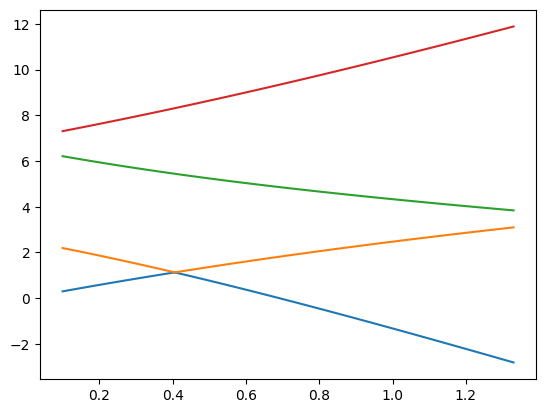

In [62]:
plt.plot(lambdas,vals_1)
plt.plot(lambdas,vals_2)
plt.plot(lambdas,vals_3)
plt.plot(lambdas,vals_4)

In [73]:
def Efficient_ansatz(N_qubits,N_layers):
    theta = ParameterVector("m",4*N_qubits*N_layers)
    qr=QuantumRegister(N_qubits)
    qc=QuantumCircuit(qr)
    k=0
    for i in range (N_qubits):
            qc.rx(theta[k],qr[i])
            k+=1
            qc.ry(theta[k],qr[i])
            k+=1
    for i in range (N_qubits-1):
        qc.cx(qr[i],qr[i+1])
    for _ in range (N_layers-1):
        for i in range (N_qubits):
            qc.rx(theta[k],qr[i])
            k+=1
            qc.ry(theta[k],qr[i])
            k+=1
        for i in range (N_qubits-1):
            qc.cx(qr[i],qr[i+1])
        for i in range (N_qubits):
            qc.rx(theta[k],qr[i])
            k+=1
            qc.ry(theta[k],qr[i])
            k+=1
    return qc

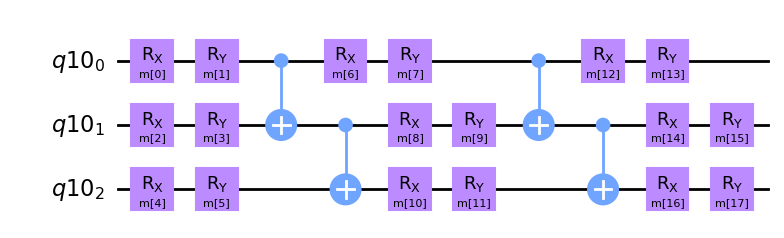

In [74]:
Efficient_ansatz(3,2).draw(output='mpl')

In [77]:
def Real_ansatz(N_qubits,N_layers):
    theta = ParameterVector("theta",4*N_qubits*N_layers)
    qr=QuantumRegister(N_qubits)
    qc=QuantumCircuit(qr)
    k=0
    for i in range (N_qubits):

            qc.ry(theta[k],qr[i])
            k+=1
    for i in range (N_qubits-1):
        qc.cx(qr[i],qr[i+1])
    for _ in range (N_layers-1):
        for i in range (N_qubits):

            qc.ry(theta[k],qr[i])
            k+=1
        for i in range (N_qubits-1):
            qc.cx(qr[i],qr[i+1])
        for i in range (N_qubits):

            qc.ry(theta[k],qr[i])
            k+=1
    return qc

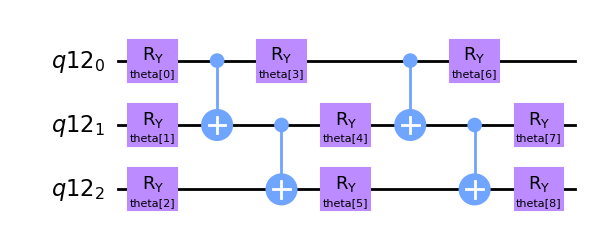

In [78]:
Real_ansatz(3,2).draw(output='mpl')

In [88]:
EvolvedOperatorAnsatz(operators=X^X+Z^Z, reps=1).draw()

┌───────────────────┐
q_0: ┤0                  ├
     │                   │
q_1: ┤1 EvolvedOps(t[0]) ├
     │                   │
q_2: ┤2                  ├
     └───────────────────┘

In [94]:
def Hamiltonian_ansatz(N_layers):
    theta = ParameterVector("theta",4*N_layers)
    qr=QuantumRegister(2)
    qc=QuantumCircuit(qr)


    for _ in range (N_layers):
        qc.h(qr[0])
        qc.h(qr[1])
        qc.cx(qr[0],qr[1])
        qc.rz(theta[0],qr[1])
        qc.cx(qr[0],qr[1])
        qc.h(qr[0])
        qc.h(qr[1])
        qc.cx(qr[0],qr[1])
        qc.rz(theta[0],qr[1])
        qc.cx(qr[0],qr[1])
        qc.rz(theta[2],qr[0])
        qc.rz(theta[3],qr[1])
    return qc

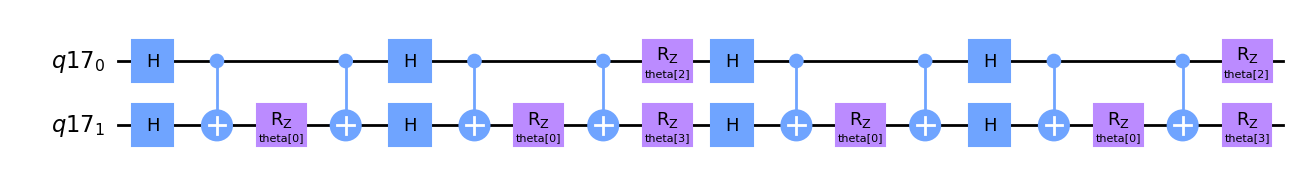

In [95]:
Hamiltonian_ansatz(2).draw(output='mpl')